## Task No: 2

To Explore Supervised Machine Learning

Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Author: Shalin Sharma

Email: shalinsharma1807@gmail.com

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Reading data from remote link

In [3]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

print(s_data)

Data imported successfully
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


## Plotting the Given Dataset to look for any visual relationship between the Data

Graph of Hours Vs Percentage

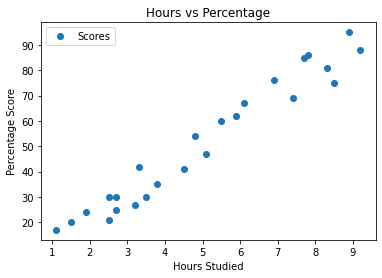

In [4]:
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

## Preparing the data

Dividing the data into Independents (inputs) and Dependents (outputs).



1.   Dependent (Score)

2.   Independent (Hours)



In [5]:
X = s_data.iloc[:, :-1].values
y = s_data.iloc[:, -1].values

In [6]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [7]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
print(X_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [11]:
print(y_train)

[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


In [12]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
print(y_test)

[20 27 69 30 62]


We have successfully splited the dataset into training dataset and testing dataset in 4:1 ratio

## Training the Simple Linear Regression model on the Training set

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [15]:
y_pred = regressor.predict(X_test)

## Visualising the Training set results

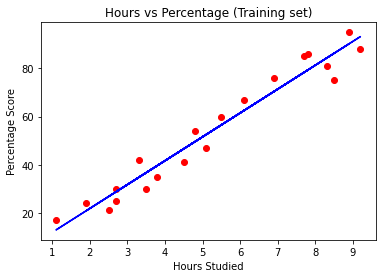

In [16]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Percentage (Training set)')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Visualising the Test set results

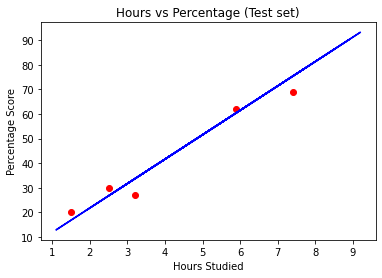

In [17]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Percentage (Test set)')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Making Predictions

Comparing the values generated using the linear model we created previously with the actual values 

i.e test values vs predicted values

In [18]:
df = pd.DataFrame({'Test': y_test, 'Predicted': y_pred})  
print(df)

   Test  Predicted
0    20  16.884145
1    27  33.732261
2    69  75.357018
3    30  26.794801
4    62  60.491033


## Making a single prediction

What will be predicted score if a student study for 9.25 hrs in a day? (Given Question)

In [19]:
print(regressor.predict([[9.25]]))

[93.69173249]


In [22]:
hours = 9.25
pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


Therefore, our model predicts that the sscore of the student who studied for 9.25 hours is 93.69173248737539

Important note: Notice that the value of the feature (9.25 hours) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting 9.25 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

9.25→scalar 

[9.25]→1D array 

[[9.25]]→2D array

Trying more data samples to test

In [23]:
print(regressor.predict([[1]]))

[11.92881652]


In [24]:
print(regressor.predict([[0]]))

[2.01816004]


In [25]:
print(regressor.predict([[5]]))

[51.57144244]


## Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

Mean absolute error (MAE)

In [26]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


Mean squared error (MSE)

In [27]:
from sklearn import metrics  
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 

Mean Squared Error: 21.598769307217456


Root mean squared error (RMSE)

In [28]:
from sklearn import metrics  
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Root Mean Squared Error: 4.647447612100373


## Getting the final linear regression equation with the values of the coefficients

In [29]:
print(regressor.coef_)
print(regressor.intercept_)

[9.91065648]
2.018160041434662


Therefore, the equation of our simple linear regression model is:

Score=9.91×Hours+2.02

Important Note: To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.